In [211]:
#Load and clean the dataset. 

import pandas as pd

data=pd.read_csv("C:\\Users\\Admin\\Desktop\\IA\\CC GENERAL.csv")
data.head(-5)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,C19181,130.838554,1.000000,591.24,0.00,591.24,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,475.523262,82.771320,1.000000,6
8941,C19182,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.000000,6
8942,C19183,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.250000,6
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6


In [212]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [213]:
print(data['CREDIT_LIMIT'].describe())
data['MINIMUM_PAYMENTS'].describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64


count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [214]:
data=data.drop('CUST_ID', axis=1)
data['MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].fillna(0.019163)
data['CREDIT_LIMIT']=data['CREDIT_LIMIT'].fillna(50.000000)
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

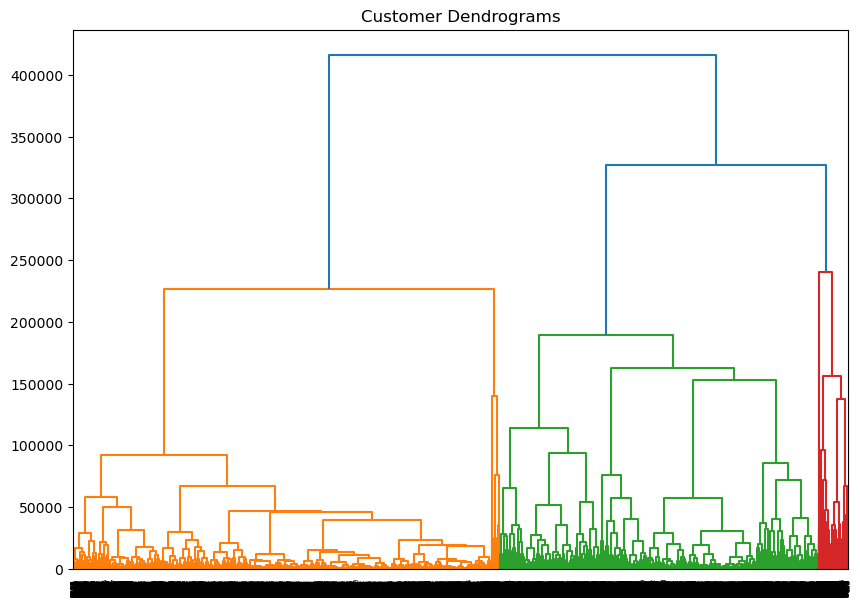

In [215]:
#Plot the dendrogram

import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="ward",metric='euclidean'))

In [216]:
#Use hierarchical clustering to identify the inherent groupings within the data

from sklearn.cluster import AgglomerativeClustering 
model=AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)

In [217]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,1
1,1
2,1
3,1
4,1
...,...
8945,1
8946,1
8947,1
8948,1


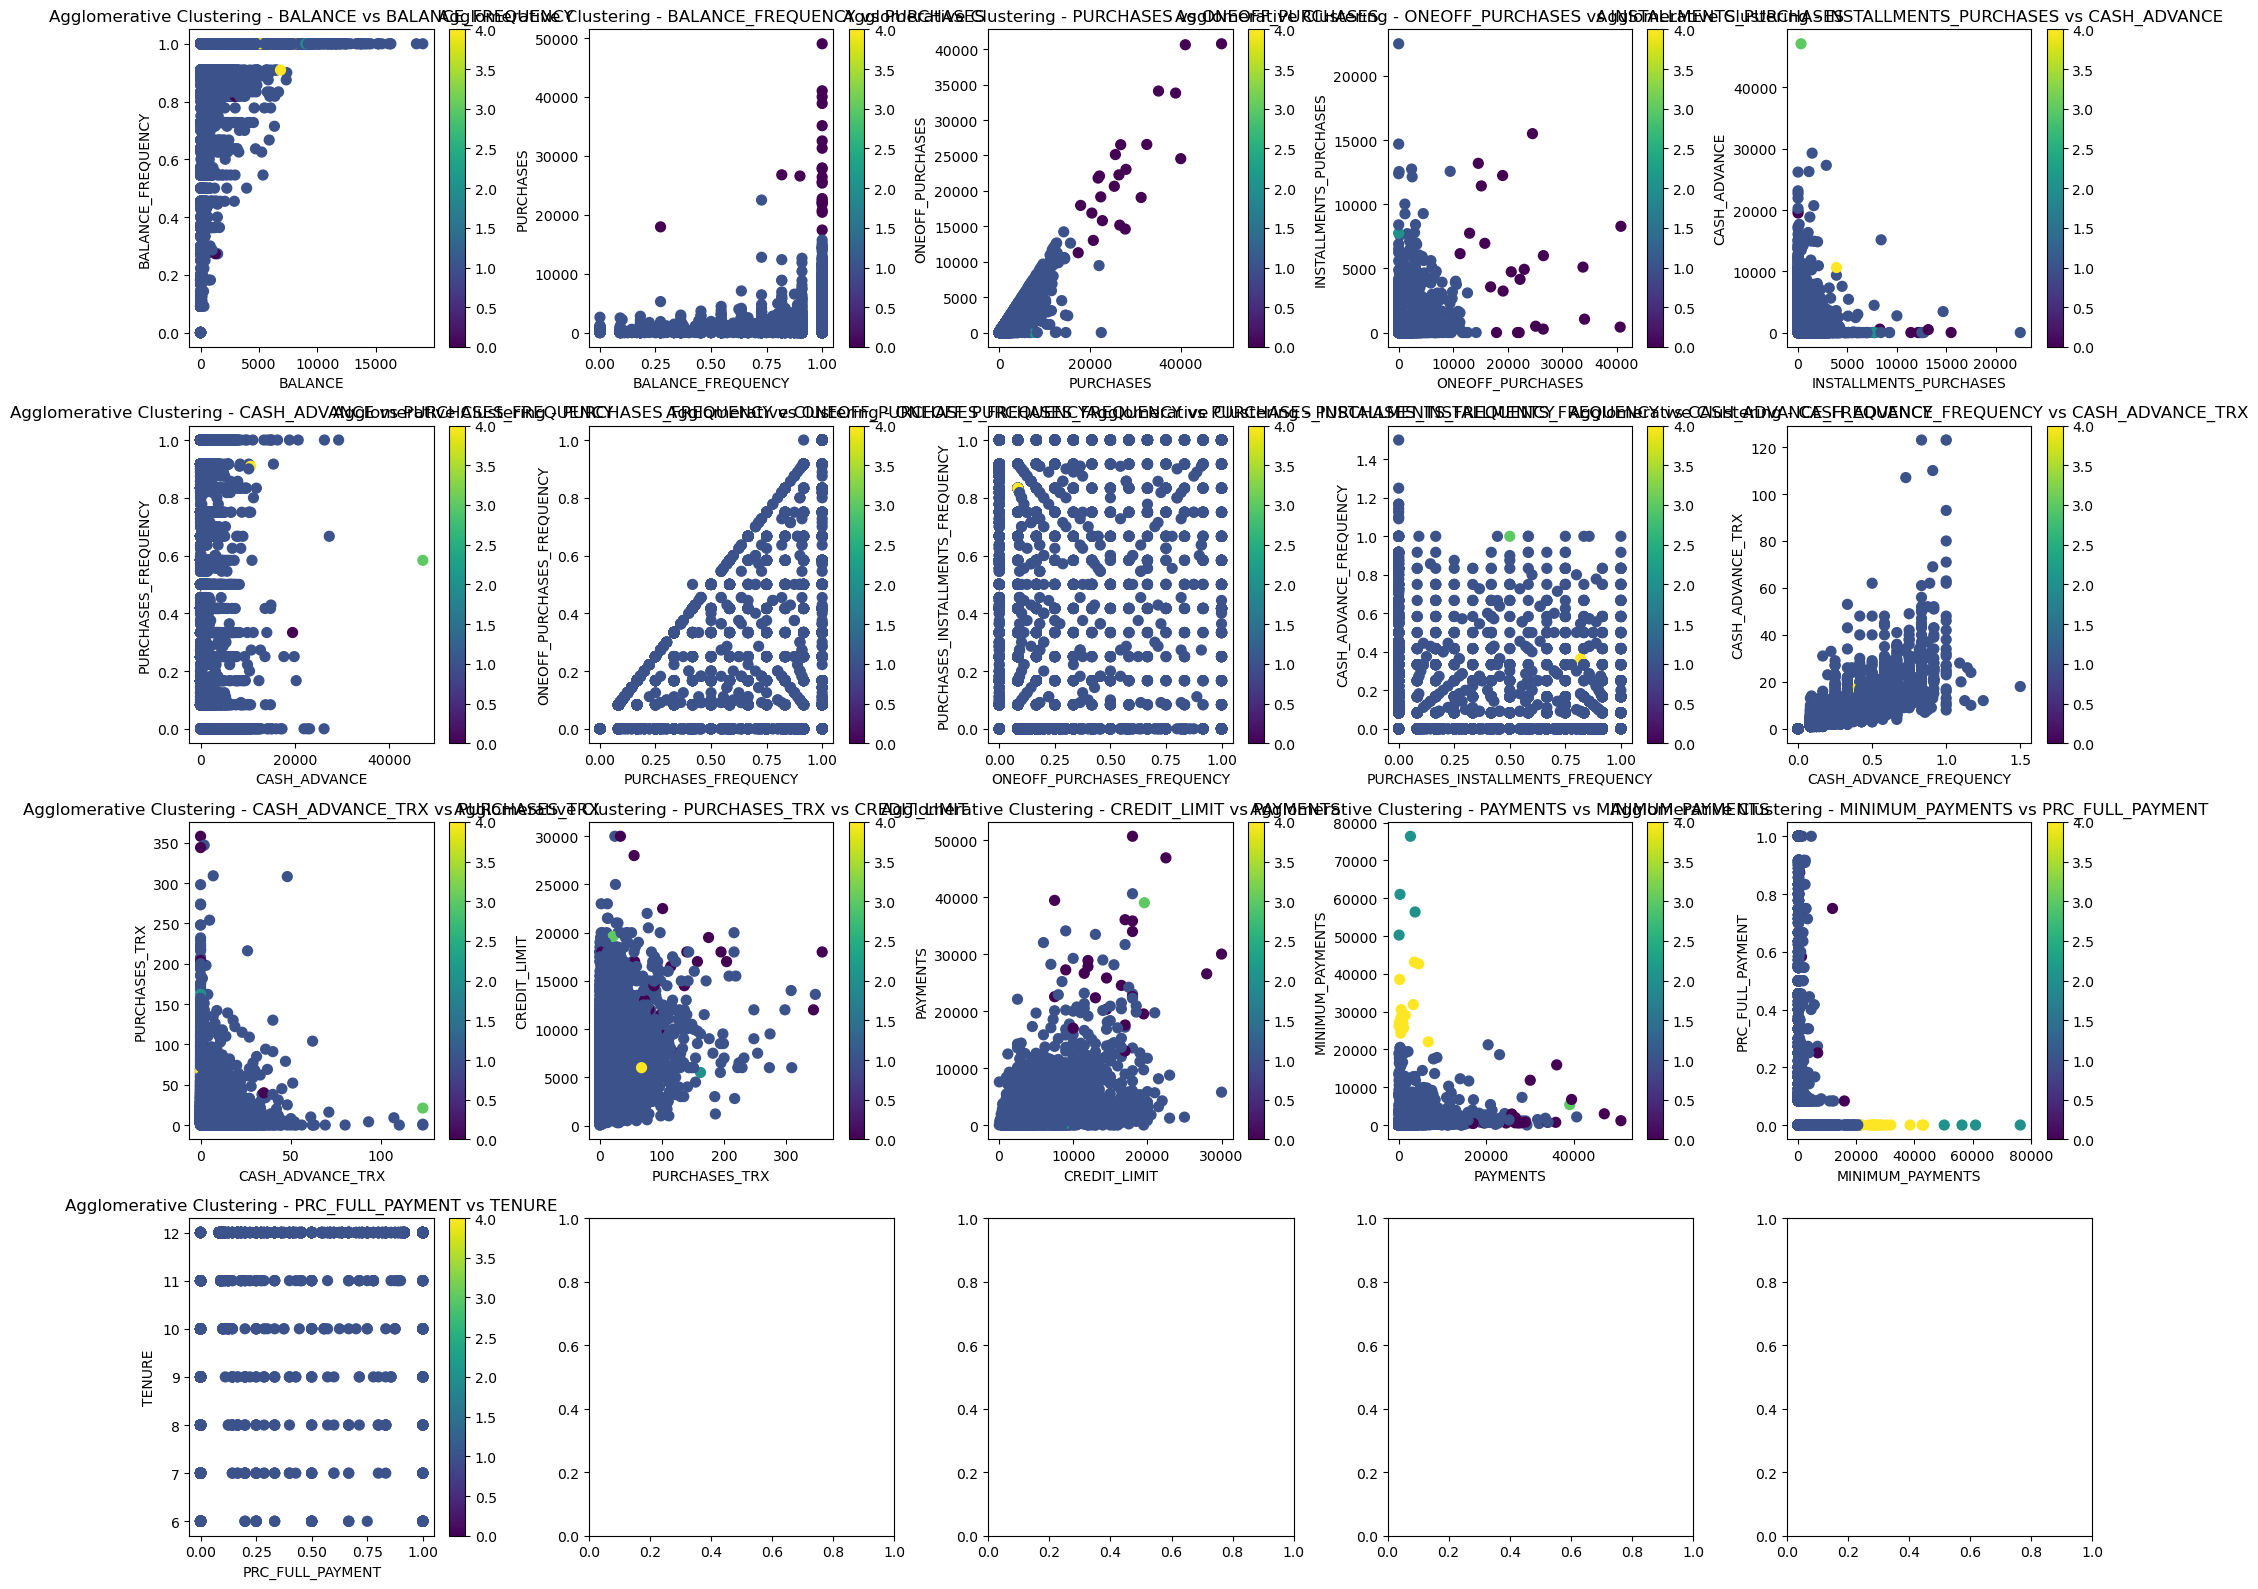

In [261]:
#Plot the clusters

import matplotlib.pyplot as plt



fig, axes = plt.subplots(4, 5, figsize=(20, 16) )

for i, ax in enumerate(axes.flatten()):
    if i < len(data.columns) - 1:  
        feature_x = data.columns[i]
        feature_y = data.columns[i + 1]
        
        scatter = ax.scatter(data[feature_x], data[feature_y], c=agglomerative[0], s=50, cmap='viridis')
        ax.set_title(f"Agglomerative Clustering - {feature_x} vs {feature_y}")
        ax.set_xlabel(feature_x)
        ax.set_ylabel(feature_y)
        plt.colorbar(scatter)


plt.tight_layout()



plt.show()


In [229]:
#Use K-means clustering
#Try different K values and select the best one

from sklearn.preprocessing import StandardScaler, normalize

scaler = StandardScaler()
data_std = scaler.fit_transform(data)

wcss = []
cluster_list = range(1, 11)
for i in cluster_list :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 40)
    kmeans.fit(data_std)
    wcss.append(kmeans.inertia_)

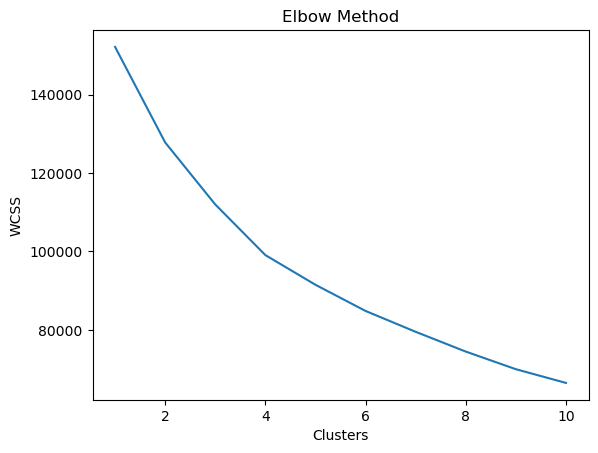

In [230]:
plt.plot(cluster_list, wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [243]:
#Try different K values and select the best one

silhouette_scores =[] 

from sklearn.metrics import silhouette_score

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(data_std, KMeans(n_clusters = n_cluster, n_init=10).fit_predict(data_std))) 
    
kmeans_values=[]


from sklearn import metrics

for cluster in range(2,20):
    kmeans = KMeans(n_clusters=cluster, n_init=10 ,random_state=40).fit_predict(data_std)
    sil_score = metrics.silhouette_score(data_std,kmeans, metric='euclidean')
    print("Silhouette score for {} cluster k-means: {:.3f}".format(cluster,
                                                               metrics.silhouette_score(data_std, kmeans, metric='euclidean')))
    kmeans_values.append((cluster,sil_score))

Silhouette score for 2 cluster k-means: 0.209
Silhouette score for 3 cluster k-means: 0.251
Silhouette score for 4 cluster k-means: 0.198
Silhouette score for 5 cluster k-means: 0.193
Silhouette score for 6 cluster k-means: 0.203
Silhouette score for 7 cluster k-means: 0.215
Silhouette score for 8 cluster k-means: 0.222
Silhouette score for 9 cluster k-means: 0.227
Silhouette score for 10 cluster k-means: 0.224
Silhouette score for 11 cluster k-means: 0.217
Silhouette score for 12 cluster k-means: 0.216
Silhouette score for 13 cluster k-means: 0.218
Silhouette score for 14 cluster k-means: 0.202
Silhouette score for 15 cluster k-means: 0.195
Silhouette score for 16 cluster k-means: 0.198
Silhouette score for 17 cluster k-means: 0.206
Silhouette score for 18 cluster k-means: 0.199
Silhouette score for 19 cluster k-means: 0.205


In [245]:
from sklearn.cluster import KMeans  
kmeans=KMeans(n_clusters=4, n_init=10, random_state=0)  
kmeans.fit(data) 

labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,1
1,2
2,2
3,2
4,1
...,...
8945,1
8946,1
8947,1
8948,1


In [246]:
kmeans.predict(data)
print(kmeans.cluster_centers_)

[[4.74899179e+03 9.07785699e-01 1.04656364e+04 7.44002466e+03
  3.02577714e+03 5.40999390e+03 7.35406684e-01 5.85385564e-01
  5.89869173e-01 2.29575541e-01 9.19548872e+00 8.34736842e+01
  1.24815789e+04 1.80663184e+04 2.34253294e+03 3.29256820e-01
  1.18421053e+01]
 [8.52922925e+02 8.52951526e-01 5.99485972e+02 3.10208377e+02
  2.89580280e+02 4.94656182e+02 4.66190213e-01 1.52693197e-01
  3.51730279e-01 1.07134660e-01 2.25862069e+00 1.06062442e+01
  2.71101640e+03 9.92750591e+02 4.93113348e+02 1.56263922e-01
  1.14279279e+01]
 [3.29404207e+03 9.40237594e-01 1.57973729e+03 9.93990465e+02
  5.86055024e+02 2.06848744e+03 5.43737317e-01 3.22386663e-01
  3.84897772e-01 2.08074662e-01 5.65820060e+00 2.20512269e+01
  8.98334246e+03 2.85255800e+03 1.16374323e+03 1.40268826e-01
  1.17369780e+01]
 [4.05814769e+03 9.88636375e-01 1.02737875e+03 1.18389464e+02
  9.08989286e+02 9.22757849e+02 4.71320321e-01 3.92315536e-02
  4.41152625e-01 1.05654714e-01 3.01785714e+00 1.86250000e+01
  4.26785714e+03

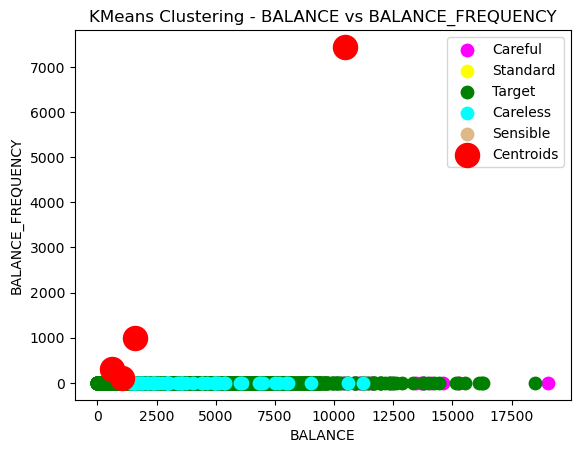

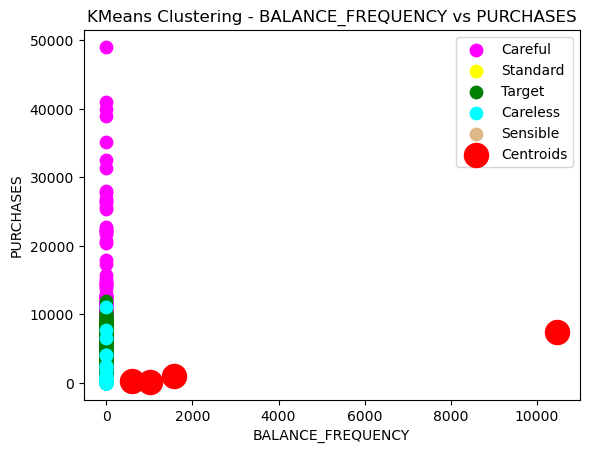

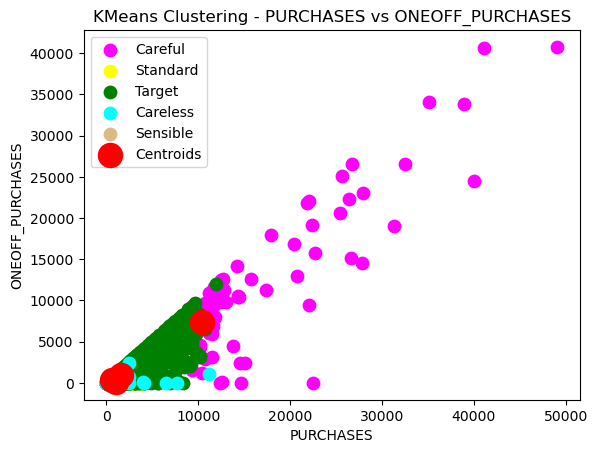

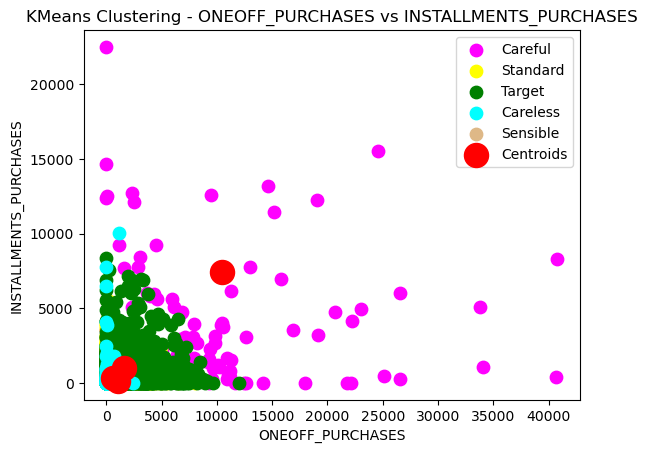

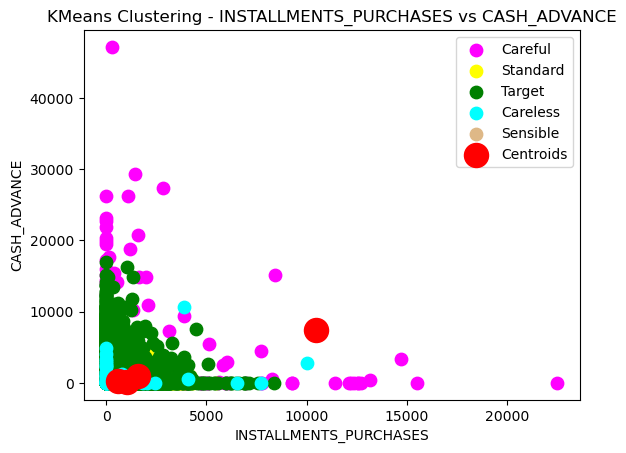

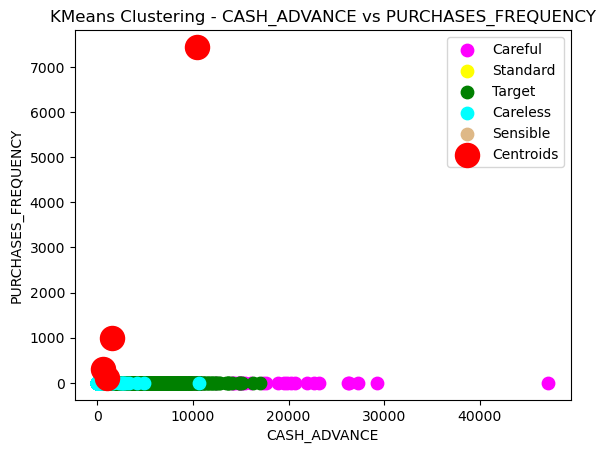

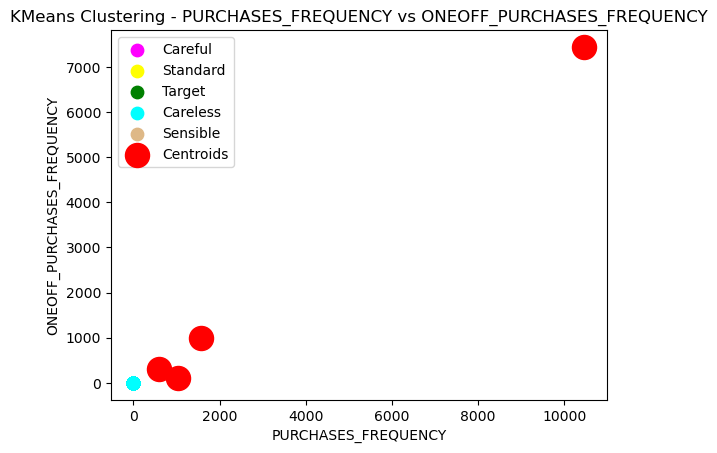

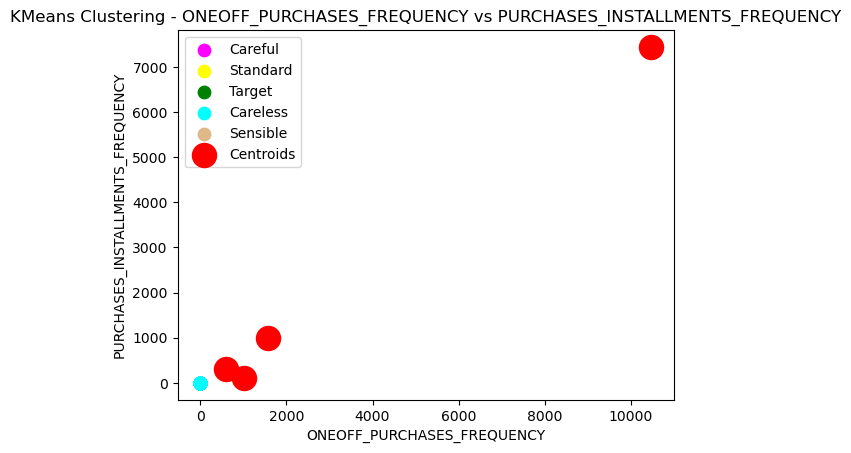

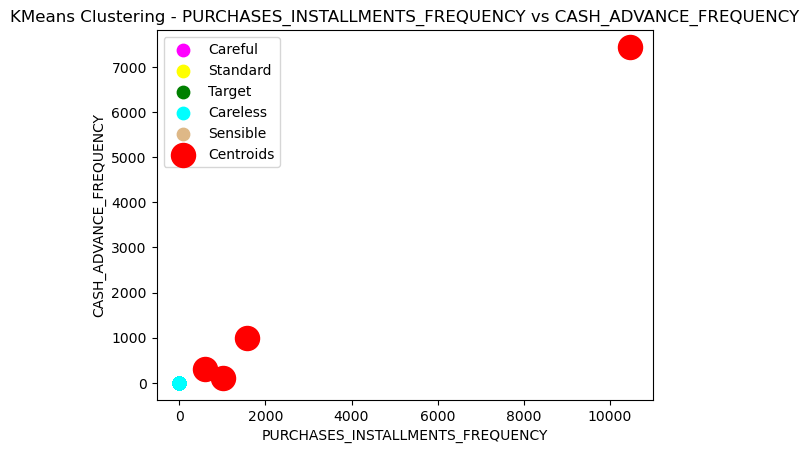

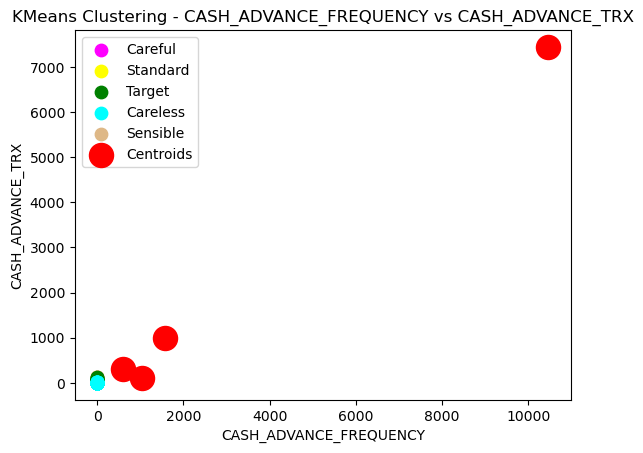

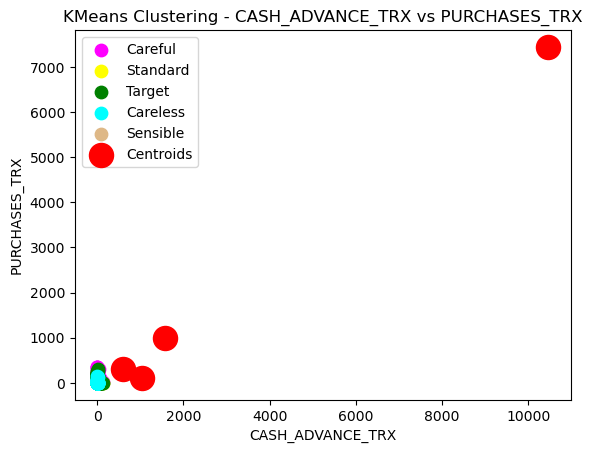

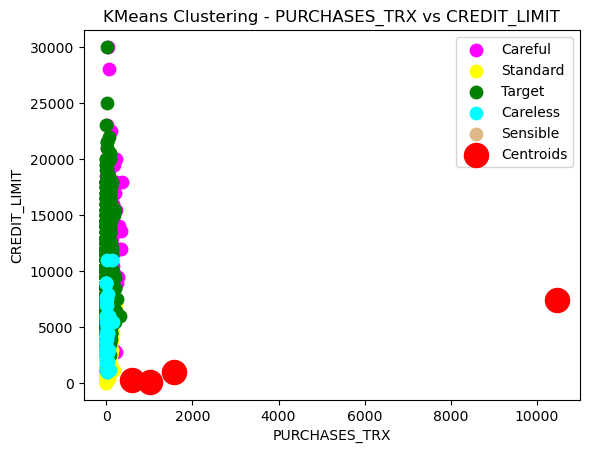

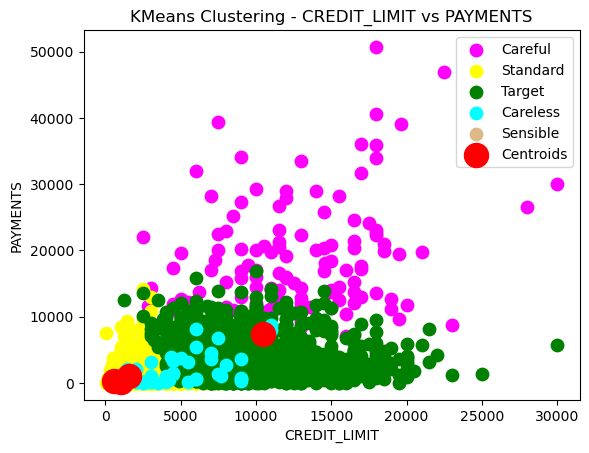

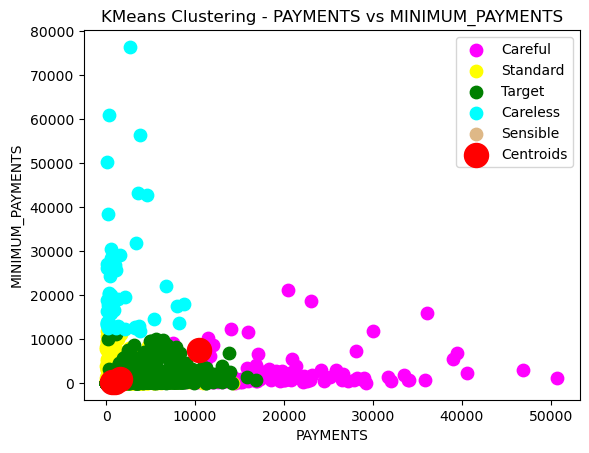

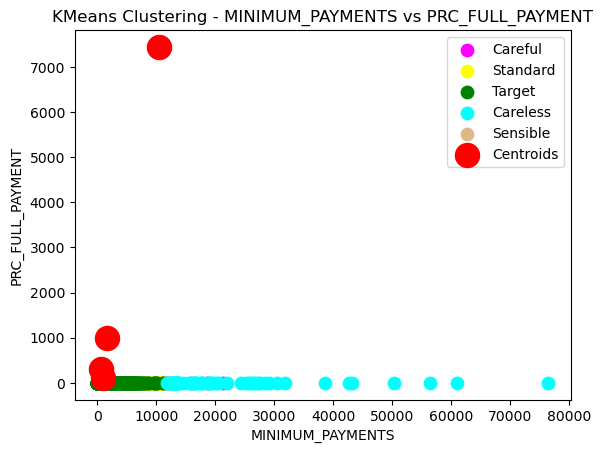

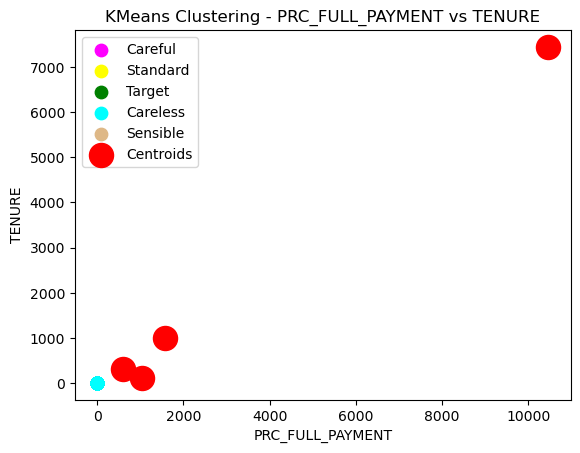

In [270]:
#Plot the clusters

import matplotlib.pyplot as plt

for i, ax in enumerate(axes.flatten()):
    if i < len(data.columns) - 1:
        feature_x = data.columns[i]
        feature_y = data.columns[i + 1]

        plt.scatter(data[feature_x][kmeans.labels_ == 0],
                    data[feature_y][kmeans.labels_ == 0], s=80, c='magenta', label='Careful')
        plt.scatter(data[feature_x][kmeans.labels_ == 1],
                    data[feature_y][kmeans.labels_ == 1], s=80, c='yellow', label='Standard')
        plt.scatter(data[feature_x][kmeans.labels_ == 2],
                    data[feature_y][kmeans.labels_ == 2], s=80, c='green', label='Target')
        plt.scatter(data[feature_x][kmeans.labels_ == 3],
                    data[feature_y][kmeans.labels_ == 3], s=80, c='cyan', label='Careless')
        plt.scatter(data[feature_x][kmeans.labels_ == 4],
                    data[feature_y][kmeans.labels_ == 4], s=80, c='burlywood', label='Sensible')
        plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=300, c='red', label='Centroids')
        plt.title(f"KMeans Clustering - {feature_x} vs {feature_y}")
        plt.xlabel(feature_x)
        plt.ylabel(feature_y)
        plt.legend()
        plt.colorbar(scatter)
        plt.show()





k-means clustering is faster and simpler, but requires choosing the number of clusters beforehand and may not capture complex structures